In [1]:
SensorNum=4 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccZ' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/loss/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/loss/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/loss/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/Time/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/Time/')
GlaphDataTimePath=WORKSPACE_PATH+'/graph/'+DataName+'/Time/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

AccZ is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
75s - loss: 0.0123 - val_loss: 0.0037
Epoch 2/50
75s - loss: 0.0027 - val_loss: 0.0022
Epoch 3/50
74s - loss: 0.0018 - val_loss: 0.0015
Epoch 4/50
75s - loss: 0.0014 - val_loss: 0.0012
Epoch 5/50
75s - loss: 0.0011 - val_loss: 9.8585e-04
Epoch 6/50
74s - loss: 9.2817e-04 - val_loss: 8.5240e-04
Epoch 7/50
74s - loss: 7.9881e-04 - val_loss: 7.8280e-04
Epoch 8/50
75s - loss: 7.1099e-04 - val_loss: 6.7451e-04
Epoch 9/50
75s - loss: 6.5291e-04 - val_loss: 6.2766e-04
Epoch 10/50
74s - loss: 6.0795e-04 - val_loss: 5.7921e-04
Epoch 11/50
74s - loss: 5.7258e-04 - val_loss: 5.3913e-04
Epoch 12/50
75s - loss: 5.4798e-04 - val_loss: 5.2658e-04
Epoch 13/50
86s - loss: 5.2889e-04 - val_loss: 5.0213e-04
Epoch 14/50
87s - loss: 5.0729e-04 - val_loss: 5.0807e-04
Epoch 15/50
86s - loss: 4.9304e-04 -

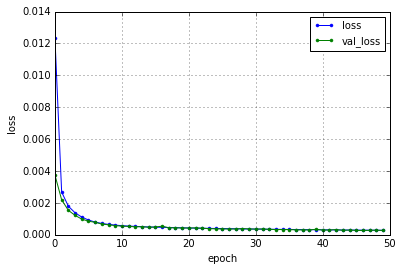

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
87s - loss: 0.0054 - val_loss: 0.0015
Epoch 2/50
87s - loss: 0.0012 - val_loss: 9.5169e-04
Epoch 3/50
87s - loss: 7.9385e-04 - val_loss: 6.9306e-04
Epoch 4/50
87s - loss: 6.1136e-04 - val_loss: 5.4421e-04
Epoch 5/50
87s - loss: 5.1132e-04 - val_loss: 4.6497e-04
Epoch 6/50
86s - loss: 4.5085e-04 - val_loss: 4.2389e-04
Epoch 7/50
85s - loss: 4.0634e-04 - val_loss: 3.8979e-04
Epoch 8/50
87s - loss: 3.6366e-04 - val_loss: 3.3235e-04
Epoch 9/50
86s - loss: 3.3611e-04 - val_loss: 3.0377e-04
Epoch 10/50
86s - loss: 3.1357e-04 - val_loss: 2.9215e-04
Epoch 11/50
87s - loss: 2.9503e-04 - val_loss: 2.7829e-04
Epoch 12/50
86s - loss: 2.7732e-04 - val_loss: 3.1999e-04
Epoch 13/50
86s - loss: 2.6153e-04 - val_loss: 2.5458e-04
Epoch 14/50
86s - loss: 2.5155e-04 - val_loss: 2.3366e-04
Epoch 15/50
86s - loss: 2.3871e-04 - val_loss: 2.3693e-04
Epoch 16/50
86s - loss: 2.2912e-04 - val_loss: 2.1424e-04
Epoch 17/50
87s - loss: 2.24

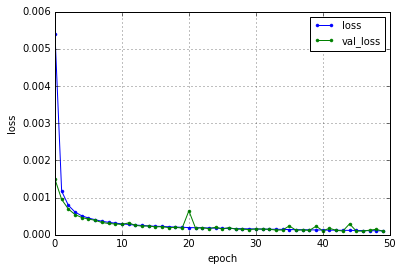

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
87s - loss: 0.0048 - val_loss: 0.0011
Epoch 2/50
87s - loss: 8.7540e-04 - val_loss: 6.7125e-04
Epoch 3/50
87s - loss: 5.9569e-04 - val_loss: 5.0205e-04
Epoch 4/50
87s - loss: 4.5417e-04 - val_loss: 3.9761e-04
Epoch 5/50
87s - loss: 3.7176e-04 - val_loss: 3.2942e-04
Epoch 6/50
87s - loss: 3.1745e-04 - val_loss: 2.8504e-04
Epoch 7/50
86s - loss: 2.7859e-04 - val_loss: 3.8969e-04
Epoch 8/50
86s - loss: 2.4849e-04 - val_loss: 2.4572e-04
Epoch 9/50
86s - loss: 2.2976e-04 - val_loss: 2.1072e-04
Epoch 10/50
86s - loss: 2.1278e-04 - val_loss: 1.8924e-04
Epoch 11/50
86s - loss: 1.9865e-04 - val_loss: 1.8848e-04
Epoch 12/50
86s - loss: 1.8633e-04 - val_loss: 1.7618e-04
Epoch 13/50
86s - loss: 1.7959e-04 - val_loss: 1.6263e-04
Epoch 14/50
87s - loss: 1.6869e-04 - val_loss: 3.7383e-04
Epoch 15/50
86s - loss: 1.6283e-04 - val_loss: 1.4956e-04
Epoch 16/50
86s - loss: 1.5532e-04 - val_loss: 1.3883e-04
Epoch 17/50
87s - loss:

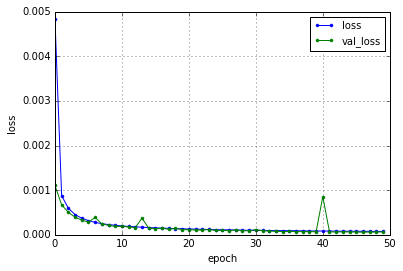

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
86s - loss: 0.0049 - val_loss: 7.6206e-04
Epoch 2/50
87s - loss: 5.7617e-04 - val_loss: 4.6398e-04
Epoch 3/50
87s - loss: 4.1931e-04 - val_loss: 3.5246e-04
Epoch 4/50
86s - loss: 3.4164e-04 - val_loss: 3.3135e-04
Epoch 5/50
86s - loss: 2.9455e-04 - val_loss: 2.6775e-04
Epoch 6/50
86s - loss: 2.5977e-04 - val_loss: 2.4441e-04
Epoch 7/50
86s - loss: 2.3020e-04 - val_loss: 2.0599e-04
Epoch 8/50
87s - loss: 2.0901e-04 - val_loss: 1.8350e-04
Epoch 9/50
87s - loss: 1.9600e-04 - val_loss: 1.8558e-04
Epoch 10/50
87s - loss: 1.8158e-04 - val_loss: 1.6575e-04
Epoch 11/50
87s - loss: 1.7168e-04 - val_loss: 1.4704e-04
Epoch 12/50
86s - loss: 1.6059e-04 - val_loss: 1.4096e-04
Epoch 13/50
87s - loss: 1.5156e-04 - val_loss: 1.8585e-04
Epoch 14/50
87s - loss: 1.4347e-04 - val_loss: 1.3383e-04
Epoch 15/50
87s - loss: 1.3887e-04 - val_loss: 1.5460e-04
Epoch 16/50
87s - loss: 1.3229e-04 - val_loss: 1.2004e-04
Epoch 17/50
87s - l

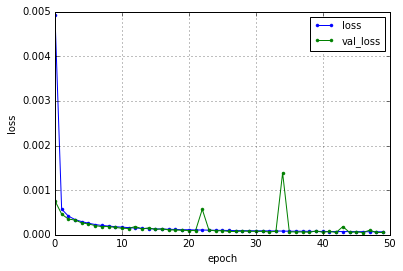

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
90s - loss: 0.0024 - val_loss: 4.4470e-04
Epoch 2/50
91s - loss: 3.6817e-04 - val_loss: 4.7292e-04
Epoch 3/50
91s - loss: 2.5321e-04 - val_loss: 2.3918e-04
Epoch 4/50
91s - loss: 1.9265e-04 - val_loss: 2.0165e-04
Epoch 5/50
91s - loss: 1.6278e-04 - val_loss: 1.3405e-04
Epoch 6/50
91s - loss: 1.4117e-04 - val_loss: 1.2291e-04
Epoch 7/50
91s - loss: 1.2705e-04 - val_loss: 1.0061e-04
Epoch 8/50
90s - loss: 1.1200e-04 - val_loss: 9.8370e-05
Epoch 9/50
92s - loss: 9.6197e-05 - val_loss: 7.2347e-05
Epoch 10/50
91s - loss: 8.0676e-05 - val_loss: 6.4203e-05
Epoch 11/50
91s - loss: 7.3336e-05 - val_loss: 6.7708e-05
Epoch 12/50
91s - loss: 6.9936e-05 - val_loss: 5.5213e-05
Epoch 13/50
90s - loss: 6.7131e-05 - val_loss: 5.1800e-05
Epoch 14/50
91s - loss: 6.5008e-05 - val_loss: 4.7373e-05
Epoch 15/50
91s - loss: 6.0996e-05 - val_loss: 5.5045e-05
Epoch 16/50
91s - loss: 5.9376e-05 - val_loss: 1.3288e-04
Epoch 17/50
91s - l

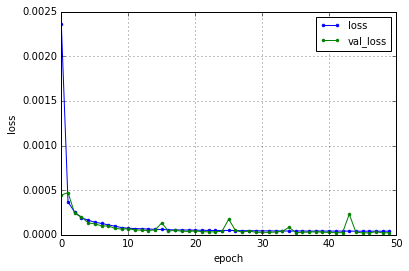

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
87s - loss: 0.0013 - val_loss: 1.6835e-04
Epoch 2/50
87s - loss: 1.4879e-04 - val_loss: 1.3371e-04
Epoch 3/50
84s - loss: 1.0661e-04 - val_loss: 7.9194e-05
Epoch 4/50
88s - loss: 8.2425e-05 - val_loss: 5.7178e-05
Epoch 5/50
87s - loss: 6.4425e-05 - val_loss: 4.5942e-05
Epoch 6/50
87s - loss: 5.7132e-05 - val_loss: 4.0534e-05
Epoch 7/50
85s - loss: 5.3358e-05 - val_loss: 3.8724e-05
Epoch 8/50
85s - loss: 5.0277e-05 - val_loss: 8.3270e-05
Epoch 9/50
83s - loss: 4.7170e-05 - val_loss: 3.0967e-05
Epoch 10/50
78s - loss: 4.4585e-05 - val_loss: 9.9643e-05
Epoch 11/50
74s - loss: 4.5115e-05 - val_loss: 3.0342e-05
Epoch 12/50
74s - loss: 4.3628e-05 - val_loss: 3.0287e-05
Epoch 13/50
75s - loss: 4.0613e-05 - val_loss: 2.8075e-05
Epoch 14/50
74s - loss: 3.9904e-05 - val_loss: 2.6408e-05
Epoch 15/50
74s - loss: 3.9095e-05 - val_loss: 2.7358e-05
Epoch 16/50
93s - loss: 3.8956e-05 - val_loss: 2.4118e-05
Epoch 17/50
75s - l

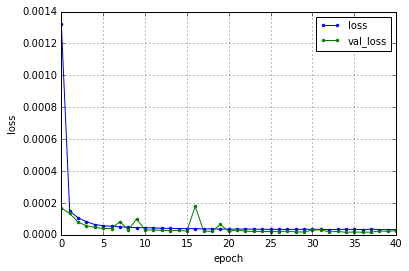

AccZ is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0311 - val_loss: 0.0131
Epoch 2/50
14s - loss: 0.0096 - val_loss: 0.0074
Epoch 3/50
15s - loss: 0.0064 - val_loss: 0.0055
Epoch 4/50
14s - loss: 0.0051 - val_loss: 0.0046
Epoch 5/50
14s - loss: 0.0041 - val_loss: 0.0037
Epoch 6/50
13s - loss: 0.0033 - val_loss: 0.0029
Epoch 7/50
13s - loss: 0.0026 - val_loss: 0.0023
Epoch 8/50
13s - loss: 0.0022 - val_loss: 0.0020
Epoch 9/50
13s - loss: 0.0019 - val_loss: 0.0018
Epoch 10/50
12s - loss: 0.0018 - val_loss: 0.0017
Epoch 11/50
12s - loss: 0.0016 - val_loss: 0.0016
Epoch 12/50
12s - loss: 0.0015 - val_loss: 0.0014
Epoch 13/50
12s - loss: 0.0014 - val_loss: 0.0014
Epoch 14/50
12s - loss: 0.0013 - val_loss: 0.0013
Epoch 15/50
12s - loss: 0.0013 - val_loss: 0.0012
Epoch 16/50
12s - loss: 0.0012 - val_loss: 0.0012
Epoch 17/50


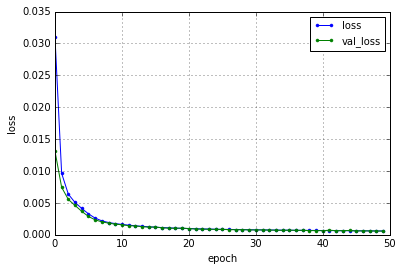

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0225 - val_loss: 0.0059
Epoch 2/50
12s - loss: 0.0043 - val_loss: 0.0033
Epoch 3/50
12s - loss: 0.0026 - val_loss: 0.0022
Epoch 4/50
12s - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
12s - loss: 0.0015 - val_loss: 0.0014
Epoch 6/50
12s - loss: 0.0013 - val_loss: 0.0012
Epoch 7/50
12s - loss: 0.0011 - val_loss: 9.9307e-04
Epoch 8/50
12s - loss: 9.6226e-04 - val_loss: 9.7896e-04
Epoch 9/50
12s - loss: 8.6915e-04 - val_loss: 0.0011
Epoch 10/50
12s - loss: 8.0480e-04 - val_loss: 7.5747e-04
Epoch 11/50
12s - loss: 7.5081e-04 - val_loss: 7.1080e-04
Epoch 12/50
12s - loss: 7.0861e-04 - val_loss: 7.0415e-04
Epoch 13/50
12s - loss: 6.6915e-04 - val_loss: 6.3014e-04
Epoch 14/50
12s - loss: 6.3241e-04 - val_loss: 5.9442e-04
Epoch 15/50
12s - loss: 6.0364e-04 - val_loss: 5.9275e-04
Epoch 16/50
12s - loss: 5.7861e-04 - val_loss: 5.5165e-04
Epoch 17/50
12s - loss: 5.5503e-04 - val_loss: 5.3916e-04
Epoch 18/50
12

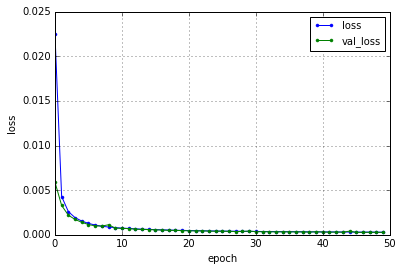

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0167 - val_loss: 0.0042
Epoch 2/50
12s - loss: 0.0029 - val_loss: 0.0020
Epoch 3/50
12s - loss: 0.0017 - val_loss: 0.0014
Epoch 4/50
12s - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
12s - loss: 9.9184e-04 - val_loss: 8.8859e-04
Epoch 6/50
12s - loss: 8.5865e-04 - val_loss: 7.8123e-04
Epoch 7/50
12s - loss: 7.5995e-04 - val_loss: 7.0636e-04
Epoch 8/50
12s - loss: 6.8762e-04 - val_loss: 6.5236e-04
Epoch 9/50
12s - loss: 6.3270e-04 - val_loss: 5.8903e-04
Epoch 10/50
12s - loss: 5.8807e-04 - val_loss: 5.3870e-04
Epoch 11/50
12s - loss: 5.5008e-04 - val_loss: 5.4269e-04
Epoch 12/50
12s - loss: 5.1397e-04 - val_loss: 4.8244e-04
Epoch 13/50
12s - loss: 4.8770e-04 - val_loss: 4.6963e-04
Epoch 14/50
12s - loss: 4.6102e-04 - val_loss: 4.3869e-04
Epoch 15/50
12s - loss: 4.4061e-04 - val_loss: 4.1028e-04
Epoch 16/50
12s - loss: 4.2135e-04 - val_loss: 8.0046e-04
Epoch 17/50
12s - loss: 4.0568e-04 - val_loss: 

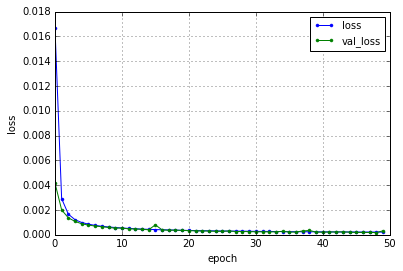

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0133 - val_loss: 0.0029
Epoch 2/50
12s - loss: 0.0020 - val_loss: 0.0015
Epoch 3/50
12s - loss: 0.0013 - val_loss: 0.0010
Epoch 4/50
12s - loss: 9.4992e-04 - val_loss: 8.2954e-04
Epoch 5/50
12s - loss: 7.7647e-04 - val_loss: 6.9442e-04
Epoch 6/50
12s - loss: 6.5661e-04 - val_loss: 6.0803e-04
Epoch 7/50
12s - loss: 5.9196e-04 - val_loss: 5.3522e-04
Epoch 8/50
12s - loss: 5.3348e-04 - val_loss: 4.8540e-04
Epoch 9/50
12s - loss: 4.8840e-04 - val_loss: 4.4269e-04
Epoch 10/50
12s - loss: 4.5035e-04 - val_loss: 4.0754e-04
Epoch 11/50
12s - loss: 4.2030e-04 - val_loss: 3.8252e-04
Epoch 12/50
12s - loss: 3.9219e-04 - val_loss: 3.6845e-04
Epoch 13/50
12s - loss: 3.6789e-04 - val_loss: 3.5864e-04
Epoch 14/50
12s - loss: 3.5138e-04 - val_loss: 3.3268e-04
Epoch 15/50
12s - loss: 3.3210e-04 - val_loss: 2.9752e-04
Epoch 16/50
12s - loss: 3.2047e-04 - val_loss: 2.8136e-04
Epoch 17/50
12s - loss: 3.0895e-04 - va

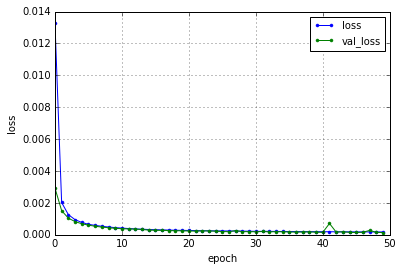

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0078 - val_loss: 0.0014
Epoch 2/50
12s - loss: 0.0011 - val_loss: 8.4239e-04
Epoch 3/50
12s - loss: 7.0676e-04 - val_loss: 0.0010
Epoch 4/50
12s - loss: 5.4940e-04 - val_loss: 4.9397e-04
Epoch 5/50
12s - loss: 4.5359e-04 - val_loss: 3.9685e-04
Epoch 6/50
12s - loss: 3.8751e-04 - val_loss: 3.4579e-04
Epoch 7/50
13s - loss: 3.4445e-04 - val_loss: 3.1727e-04
Epoch 8/50
12s - loss: 3.1128e-04 - val_loss: 2.9212e-04
Epoch 9/50
12s - loss: 2.8785e-04 - val_loss: 2.4548e-04
Epoch 10/50
13s - loss: 2.6498e-04 - val_loss: 2.2462e-04
Epoch 11/50
13s - loss: 2.4931e-04 - val_loss: 2.1348e-04
Epoch 12/50
13s - loss: 2.3506e-04 - val_loss: 1.9410e-04
Epoch 13/50
13s - loss: 2.2331e-04 - val_loss: 1.9929e-04
Epoch 14/50
12s - loss: 2.1334e-04 - val_loss: 1.8960e-04
Epoch 15/50
13s - loss: 2.0757e-04 - val_loss: 1.6719e-04
Epoch 16/50
13s - loss: 1.9759e-04 - val_loss: 2.0011e-04
Epoch 17/50
12s - loss: 1.9559e

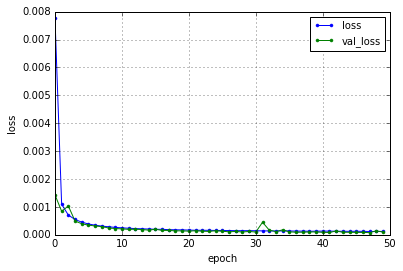

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
12s - loss: 0.0054 - val_loss: 7.0851e-04
Epoch 2/50
12s - loss: 5.4793e-04 - val_loss: 4.2014e-04
Epoch 3/50
13s - loss: 3.7153e-04 - val_loss: 2.9240e-04
Epoch 4/50
12s - loss: 2.9401e-04 - val_loss: 2.4875e-04
Epoch 5/50
12s - loss: 2.4739e-04 - val_loss: 2.0954e-04
Epoch 6/50
12s - loss: 2.2153e-04 - val_loss: 1.9165e-04
Epoch 7/50
13s - loss: 2.0473e-04 - val_loss: 1.6518e-04
Epoch 8/50
12s - loss: 1.8708e-04 - val_loss: 1.5020e-04
Epoch 9/50
11s - loss: 1.8104e-04 - val_loss: 1.3988e-04
Epoch 10/50
12s - loss: 1.7359e-04 - val_loss: 1.2823e-04
Epoch 11/50
12s - loss: 1.5996e-04 - val_loss: 1.2399e-04
Epoch 12/50
12s - loss: 1.5883e-04 - val_loss: 1.4265e-04
Epoch 13/50
12s - loss: 1.5215e-04 - val_loss: 1.1360e-04
Epoch 14/50
12s - loss: 1.4520e-04 - val_loss: 1.0507e-04
Epoch 15/50
12s - loss: 1.4234e-04 - val_loss: 1.1329e-04
Epoch 16/50
12s - loss: 1.3716e-04 - val_loss: 9.8814e-05
Epoch 17/50
12s - l

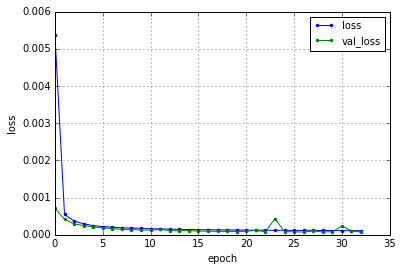

AccZ is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0675 - val_loss: 0.0323
Epoch 2/50
3s - loss: 0.0266 - val_loss: 0.0221
Epoch 3/50
2s - loss: 0.0195 - val_loss: 0.0176
Epoch 4/50
2s - loss: 0.0163 - val_loss: 0.0151
Epoch 5/50
3s - loss: 0.0138 - val_loss: 0.0124
Epoch 6/50
3s - loss: 0.0113 - val_loss: 0.0102
Epoch 7/50
3s - loss: 0.0094 - val_loss: 0.0086
Epoch 8/50
3s - loss: 0.0081 - val_loss: 0.0076
Epoch 9/50
3s - loss: 0.0072 - val_loss: 0.0069
Epoch 10/50
3s - loss: 0.0065 - val_loss: 0.0062
Epoch 11/50
3s - loss: 0.0059 - val_loss: 0.0056
Epoch 12/50
3s - loss: 0.0055 - val_loss: 0.0053
Epoch 13/50
3s - loss: 0.0051 - val_loss: 0.0049
Epoch 14/50
3s - loss: 0.0047 - val_loss: 0.0048
Epoch 15/50
3s - loss: 0.0045 - val_loss: 0.0043
Epoch 16/50
3s - loss: 0.0043 - val_loss: 0.0042
Epoch 17/50
3s - loss: 0.004

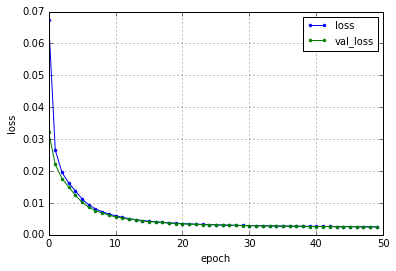

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0504 - val_loss: 0.0210
Epoch 2/50
2s - loss: 0.0163 - val_loss: 0.0128
Epoch 3/50
2s - loss: 0.0107 - val_loss: 0.0090
Epoch 4/50
3s - loss: 0.0079 - val_loss: 0.0068
Epoch 5/50
3s - loss: 0.0061 - val_loss: 0.0054
Epoch 6/50
3s - loss: 0.0049 - val_loss: 0.0045
Epoch 7/50
3s - loss: 0.0042 - val_loss: 0.0038
Epoch 8/50
3s - loss: 0.0036 - val_loss: 0.0034
Epoch 9/50
3s - loss: 0.0032 - val_loss: 0.0031
Epoch 10/50
3s - loss: 0.0029 - val_loss: 0.0028
Epoch 11/50
3s - loss: 0.0026 - val_loss: 0.0025
Epoch 12/50
3s - loss: 0.0024 - val_loss: 0.0023
Epoch 13/50
3s - loss: 0.0023 - val_loss: 0.0021
Epoch 14/50
3s - loss: 0.0021 - val_loss: 0.0020
Epoch 15/50
3s - loss: 0.0020 - val_loss: 0.0019
Epoch 16/50
3s - loss: 0.0019 - val_loss: 0.0018
Epoch 17/50
3s - loss: 0.0018 - val_loss: 0.0017
Epoch 18/50
3s - loss: 0.0017 - val_loss: 0.0017
Epoch 19/50
3s - loss: 0.0017 - val_loss: 0.0016
Epoch 20/50
3

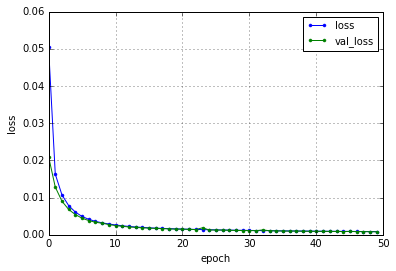

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0415 - val_loss: 0.0164
Epoch 2/50
2s - loss: 0.0114 - val_loss: 0.0083
Epoch 3/50
2s - loss: 0.0067 - val_loss: 0.0055
Epoch 4/50
2s - loss: 0.0049 - val_loss: 0.0043
Epoch 5/50
2s - loss: 0.0039 - val_loss: 0.0035
Epoch 6/50
3s - loss: 0.0033 - val_loss: 0.0031
Epoch 7/50
3s - loss: 0.0029 - val_loss: 0.0027
Epoch 8/50
3s - loss: 0.0025 - val_loss: 0.0024
Epoch 9/50
3s - loss: 0.0023 - val_loss: 0.0021
Epoch 10/50
3s - loss: 0.0020 - val_loss: 0.0019
Epoch 11/50
3s - loss: 0.0018 - val_loss: 0.0017
Epoch 12/50
3s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/50
3s - loss: 0.0016 - val_loss: 0.0015
Epoch 14/50
3s - loss: 0.0015 - val_loss: 0.0014
Epoch 15/50
3s - loss: 0.0014 - val_loss: 0.0015
Epoch 16/50
3s - loss: 0.0013 - val_loss: 0.0012
Epoch 17/50
3s - loss: 0.0013 - val_loss: 0.0012
Epoch 18/50
2s - loss: 0.0012 - val_loss: 0.0011
Epoch 19/50
3s - loss: 0.0012 - val_loss: 0.0016
Epoch 20/50


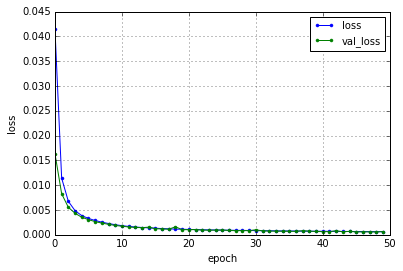

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0393 - val_loss: 0.0142
Epoch 2/50
3s - loss: 0.0100 - val_loss: 0.0070
Epoch 3/50
3s - loss: 0.0056 - val_loss: 0.0045
Epoch 4/50
3s - loss: 0.0039 - val_loss: 0.0034
Epoch 5/50
3s - loss: 0.0031 - val_loss: 0.0028
Epoch 6/50
3s - loss: 0.0026 - val_loss: 0.0024
Epoch 7/50
3s - loss: 0.0022 - val_loss: 0.0021
Epoch 8/50
2s - loss: 0.0020 - val_loss: 0.0020
Epoch 9/50
3s - loss: 0.0018 - val_loss: 0.0016
Epoch 10/50
3s - loss: 0.0016 - val_loss: 0.0016
Epoch 11/50
3s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
3s - loss: 0.0014 - val_loss: 0.0013
Epoch 13/50
3s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 15/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 16/50
3s - loss: 0.0011 - val_loss: 0.0011
Epoch 17/50
3s - loss: 0.0010 - val_loss: 9.7684e-04
Epoch 18/50
3s - loss: 0.0010 - val_loss: 0.0010
Epoch 19/50
3s - loss: 9.7230e-04 - val_loss: 9.0573e-04


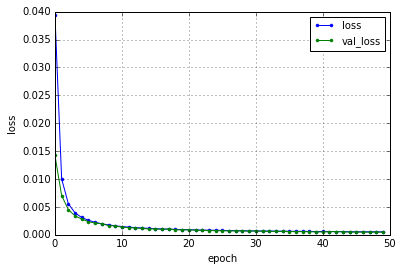

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0261 - val_loss: 0.0065
Epoch 2/50
3s - loss: 0.0046 - val_loss: 0.0037
Epoch 3/50
2s - loss: 0.0028 - val_loss: 0.0023
Epoch 4/50
2s - loss: 0.0021 - val_loss: 0.0018
Epoch 5/50
3s - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50
3s - loss: 0.0014 - val_loss: 0.0012
Epoch 7/50
3s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
2s - loss: 0.0011 - val_loss: 0.0010
Epoch 9/50
3s - loss: 9.8399e-04 - val_loss: 8.9127e-04
Epoch 10/50
3s - loss: 9.0774e-04 - val_loss: 0.0015
Epoch 11/50
3s - loss: 8.4766e-04 - val_loss: 7.9943e-04
Epoch 12/50
2s - loss: 7.9063e-04 - val_loss: 8.3070e-04
Epoch 13/50
2s - loss: 7.5266e-04 - val_loss: 6.9731e-04
Epoch 14/50
2s - loss: 7.1498e-04 - val_loss: 6.3153e-04
Epoch 15/50
2s - loss: 6.7813e-04 - val_loss: 6.7513e-04
Epoch 16/50
2s - loss: 6.5001e-04 - val_loss: 7.3446e-04
Epoch 17/50
2s - loss: 6.1446e-04 - val_loss: 5.4905e-04
Epoch 18/50
2s - loss: 5.9535e-04 - val_lo

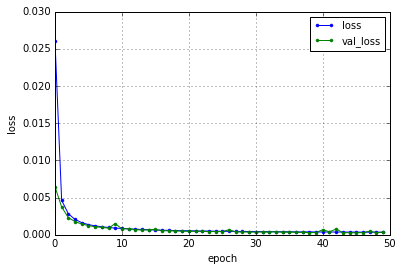

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
2s - loss: 0.0216 - val_loss: 0.0032
Epoch 2/50
2s - loss: 0.0024 - val_loss: 0.0017
Epoch 3/50
2s - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
2s - loss: 0.0011 - val_loss: 9.3533e-04
Epoch 5/50
2s - loss: 9.0091e-04 - val_loss: 9.7771e-04
Epoch 6/50
2s - loss: 7.8086e-04 - val_loss: 6.7573e-04
Epoch 7/50
2s - loss: 6.9271e-04 - val_loss: 6.1008e-04
Epoch 8/50
2s - loss: 6.2793e-04 - val_loss: 5.9008e-04
Epoch 9/50
2s - loss: 5.7454e-04 - val_loss: 5.1100e-04
Epoch 10/50
2s - loss: 5.3624e-04 - val_loss: 4.7363e-04
Epoch 11/50
2s - loss: 5.0144e-04 - val_loss: 4.4686e-04
Epoch 12/50
2s - loss: 4.7598e-04 - val_loss: 4.1469e-04
Epoch 13/50
2s - loss: 4.4939e-04 - val_loss: 3.9370e-04
Epoch 14/50
2s - loss: 4.3205e-04 - val_loss: 4.6528e-04
Epoch 15/50
2s - loss: 4.2121e-04 - val_loss: 3.4437e-04
Epoch 16/50
2s - loss: 4.0376e-04 - val_loss: 3.3009e-04
Epoch 17/50
2s - loss: 3.9345e-04 - val_loss: 3.5818e-04
Ep

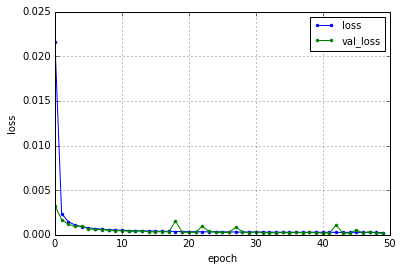

AccZ is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1328 - val_loss: 0.0777
Epoch 2/50
0s - loss: 0.0624 - val_loss: 0.0536
Epoch 3/50
0s - loss: 0.0492 - val_loss: 0.0453
Epoch 4/50
0s - loss: 0.0419 - val_loss: 0.0386
Epoch 5/50
0s - loss: 0.0359 - val_loss: 0.0333
Epoch 6/50
0s - loss: 0.0314 - val_loss: 0.0295
Epoch 7/50
0s - loss: 0.0282 - val_loss: 0.0269
Epoch 8/50
0s - loss: 0.0258 - val_loss: 0.0248
Epoch 9/50
0s - loss: 0.0240 - val_loss: 0.0234
Epoch 10/50
0s - loss: 0.0226 - val_loss: 0.0221
Epoch 11/50
0s - loss: 0.0215 - val_loss: 0.0209
Epoch 12/50
0s - loss: 0.0205 - val_loss: 0.0200
Epoch 13/50
0s - loss: 0.0196 - val_loss: 0.0191
Epoch 14/50
0s - loss: 0.0188 - val_loss: 0.0184
Epoch 15/50
0s - loss: 0.0181 - val_loss: 0.0178
Epoch 16/50
0s - loss: 0.0176 - val_loss: 0.0173
Epoch 17/50
0s - loss: 0.0171 

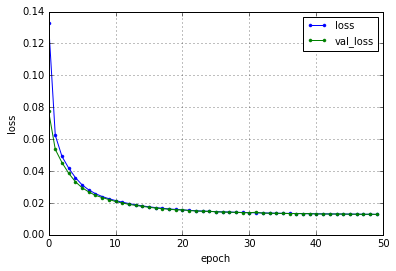

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0962 - val_loss: 0.0537
Epoch 2/50
0s - loss: 0.0462 - val_loss: 0.0401
Epoch 3/50
0s - loss: 0.0356 - val_loss: 0.0317
Epoch 4/50
0s - loss: 0.0290 - val_loss: 0.0265
Epoch 5/50
0s - loss: 0.0247 - val_loss: 0.0230
Epoch 6/50
0s - loss: 0.0217 - val_loss: 0.0204
Epoch 7/50
0s - loss: 0.0194 - val_loss: 0.0184
Epoch 8/50
0s - loss: 0.0175 - val_loss: 0.0166
Epoch 9/50
0s - loss: 0.0159 - val_loss: 0.0150
Epoch 10/50
0s - loss: 0.0144 - val_loss: 0.0137
Epoch 11/50
0s - loss: 0.0131 - val_loss: 0.0124
Epoch 12/50
0s - loss: 0.0119 - val_loss: 0.0113
Epoch 13/50
0s - loss: 0.0109 - val_loss: 0.0105
Epoch 14/50
0s - loss: 0.0100 - val_loss: 0.0096
Epoch 15/50
0s - loss: 0.0093 - val_loss: 0.0089
Epoch 16/50
0s - loss: 0.0088 - val_loss: 0.0085
Epoch 17/50
0s - loss: 0.0083 - val_loss: 0.0080
Epoch 18/50
0s - loss: 0.0079 - val_loss: 0.0076
Epoch 19/50
0s - loss: 0.0076 - val_loss: 0.0074
Epoch 20/50
0s 

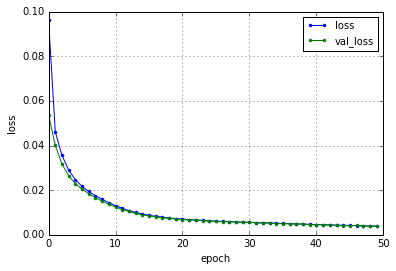

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0898 - val_loss: 0.0474
Epoch 2/50
0s - loss: 0.0397 - val_loss: 0.0330
Epoch 3/50
0s - loss: 0.0284 - val_loss: 0.0244
Epoch 4/50
0s - loss: 0.0217 - val_loss: 0.0193
Epoch 5/50
0s - loss: 0.0176 - val_loss: 0.0159
Epoch 6/50
0s - loss: 0.0148 - val_loss: 0.0136
Epoch 7/50
0s - loss: 0.0128 - val_loss: 0.0118
Epoch 8/50
0s - loss: 0.0112 - val_loss: 0.0105
Epoch 9/50
0s - loss: 0.0100 - val_loss: 0.0099
Epoch 10/50
0s - loss: 0.0090 - val_loss: 0.0085
Epoch 11/50
0s - loss: 0.0082 - val_loss: 0.0079
Epoch 12/50
0s - loss: 0.0076 - val_loss: 0.0073
Epoch 13/50
0s - loss: 0.0071 - val_loss: 0.0068
Epoch 14/50
0s - loss: 0.0067 - val_loss: 0.0065
Epoch 15/50
0s - loss: 0.0063 - val_loss: 0.0061
Epoch 16/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 17/50
0s - loss: 0.0057 - val_loss: 0.0056
Epoch 18/50
0s - loss: 0.0055 - val_loss: 0.0053
Epoch 19/50
0s - loss: 0.0052 - val_loss: 0.0061
Epoch 20/50
0s

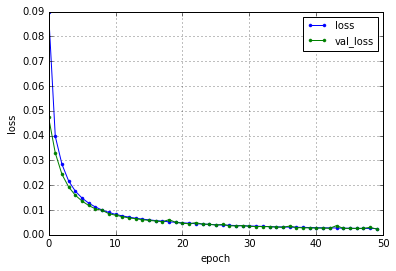

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0802 - val_loss: 0.0435
Epoch 2/50
0s - loss: 0.0352 - val_loss: 0.0282
Epoch 3/50
0s - loss: 0.0238 - val_loss: 0.0200
Epoch 4/50
0s - loss: 0.0177 - val_loss: 0.0158
Epoch 5/50
0s - loss: 0.0141 - val_loss: 0.0127
Epoch 6/50
0s - loss: 0.0116 - val_loss: 0.0106
Epoch 7/50
0s - loss: 0.0099 - val_loss: 0.0091
Epoch 8/50
0s - loss: 0.0086 - val_loss: 0.0082
Epoch 9/50
0s - loss: 0.0076 - val_loss: 0.0071
Epoch 10/50
0s - loss: 0.0069 - val_loss: 0.0064
Epoch 11/50
0s - loss: 0.0062 - val_loss: 0.0059
Epoch 12/50
0s - loss: 0.0058 - val_loss: 0.0059
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0055
Epoch 14/50
0s - loss: 0.0050 - val_loss: 0.0048
Epoch 15/50
0s - loss: 0.0047 - val_loss: 0.0047
Epoch 16/50
0s - loss: 0.0045 - val_loss: 0.0049
Epoch 17/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 18/50
0s - loss: 0.0040 - val_loss: 0.0040
Epoch 19/50
0s - loss: 0.0039 - val_loss: 0.0037
Epoch 20/50
0s

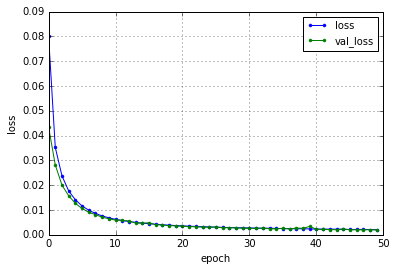

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0697 - val_loss: 0.0330
Epoch 2/50
0s - loss: 0.0243 - val_loss: 0.0179
Epoch 3/50
0s - loss: 0.0145 - val_loss: 0.0118
Epoch 4/50
0s - loss: 0.0101 - val_loss: 0.0086
Epoch 5/50
0s - loss: 0.0077 - val_loss: 0.0072
Epoch 6/50
0s - loss: 0.0062 - val_loss: 0.0056
Epoch 7/50
0s - loss: 0.0052 - val_loss: 0.0048
Epoch 8/50
0s - loss: 0.0046 - val_loss: 0.0042
Epoch 9/50
0s - loss: 0.0041 - val_loss: 0.0038
Epoch 10/50
0s - loss: 0.0037 - val_loss: 0.0037
Epoch 11/50
0s - loss: 0.0034 - val_loss: 0.0035
Epoch 12/50
0s - loss: 0.0032 - val_loss: 0.0030
Epoch 13/50
0s - loss: 0.0030 - val_loss: 0.0029
Epoch 14/50
0s - loss: 0.0028 - val_loss: 0.0029
Epoch 15/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0026 - val_loss: 0.0026
Epoch 17/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 18/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 19/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 20/50
0s

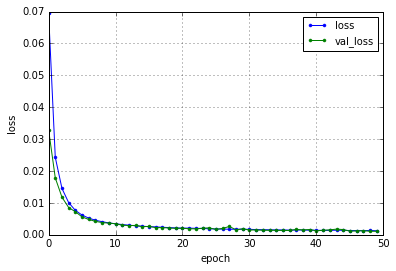

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0556 - val_loss: 0.0230
Epoch 2/50
0s - loss: 0.0150 - val_loss: 0.0099
Epoch 3/50
0s - loss: 0.0078 - val_loss: 0.0062
Epoch 4/50
0s - loss: 0.0054 - val_loss: 0.0046
Epoch 5/50
0s - loss: 0.0042 - val_loss: 0.0037
Epoch 6/50
0s - loss: 0.0035 - val_loss: 0.0032
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0027
Epoch 8/50
0s - loss: 0.0027 - val_loss: 0.0024
Epoch 9/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0023
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 17/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0021
Epoch 19/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 20/50
0s

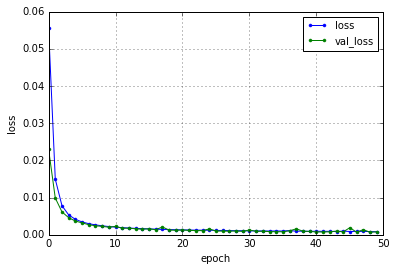

AccZ is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1828 - val_loss: 0.1421
Epoch 2/50
0s - loss: 0.1119 - val_loss: 0.0907
Epoch 3/50
0s - loss: 0.0819 - val_loss: 0.0751
Epoch 4/50
0s - loss: 0.0716 - val_loss: 0.0685
Epoch 5/50
0s - loss: 0.0664 - val_loss: 0.0645
Epoch 6/50
0s - loss: 0.0631 - val_loss: 0.0617
Epoch 7/50
0s - loss: 0.0606 - val_loss: 0.0597
Epoch 8/50
0s - loss: 0.0589 - val_loss: 0.0581
Epoch 9/50
0s - loss: 0.0576 - val_loss: 0.0572
Epoch 10/50
0s - loss: 0.0566 - val_loss: 0.0561
Epoch 11/50
0s - loss: 0.0559 - val_loss: 0.0555
Epoch 12/50
0s - loss: 0.0552 - val_loss: 0.0549
Epoch 13/50
0s - loss: 0.0547 - val_loss: 0.0545
Epoch 14/50
0s - loss: 0.0542 - val_loss: 0.0545
Epoch 15/50
0s - loss: 0.0537 - val_loss: 0.0538
Epoch 16/50
0s - loss: 0.0532 - val_loss: 0.0530
Epoch 17/50
0s - loss: 0.0526 

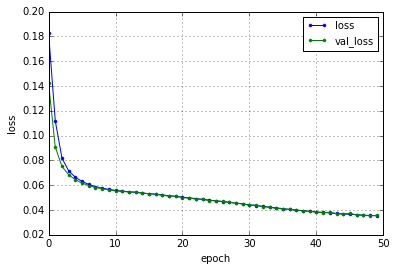

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1672 - val_loss: 0.1099
Epoch 2/50
0s - loss: 0.0843 - val_loss: 0.0712
Epoch 3/50
0s - loss: 0.0673 - val_loss: 0.0643
Epoch 4/50
0s - loss: 0.0623 - val_loss: 0.0605
Epoch 5/50
0s - loss: 0.0593 - val_loss: 0.0581
Epoch 6/50
0s - loss: 0.0571 - val_loss: 0.0562
Epoch 7/50
0s - loss: 0.0556 - val_loss: 0.0550
Epoch 8/50
0s - loss: 0.0543 - val_loss: 0.0538
Epoch 9/50
0s - loss: 0.0531 - val_loss: 0.0524
Epoch 10/50
0s - loss: 0.0518 - val_loss: 0.0512
Epoch 11/50
0s - loss: 0.0504 - val_loss: 0.0496
Epoch 12/50
0s - loss: 0.0488 - val_loss: 0.0480
Epoch 13/50
0s - loss: 0.0471 - val_loss: 0.0461
Epoch 14/50
0s - loss: 0.0453 - val_loss: 0.0445
Epoch 15/50
0s - loss: 0.0435 - val_loss: 0.0425
Epoch 16/50
0s - loss: 0.0417 - val_loss: 0.0412
Epoch 17/50
0s - loss: 0.0401 - val_loss: 0.0393
Epoch 18/50
0s - loss: 0.0385 - val_loss: 0.0378
Epoch 19/50
0s - loss: 0.0370 - val_loss: 0.0363
Epoch 20/50
0s 

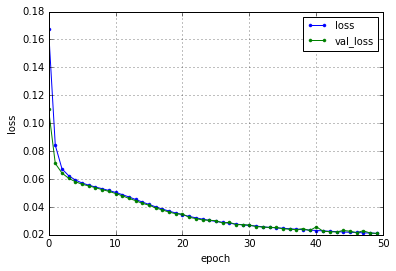

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1633 - val_loss: 0.0961
Epoch 2/50
0s - loss: 0.0764 - val_loss: 0.0671
Epoch 3/50
0s - loss: 0.0639 - val_loss: 0.0611
Epoch 4/50
0s - loss: 0.0593 - val_loss: 0.0575
Epoch 5/50
0s - loss: 0.0561 - val_loss: 0.0546
Epoch 6/50
0s - loss: 0.0535 - val_loss: 0.0522
Epoch 7/50
0s - loss: 0.0510 - val_loss: 0.0497
Epoch 8/50
0s - loss: 0.0486 - val_loss: 0.0473
Epoch 9/50
0s - loss: 0.0461 - val_loss: 0.0458
Epoch 10/50
0s - loss: 0.0437 - val_loss: 0.0424
Epoch 11/50
0s - loss: 0.0414 - val_loss: 0.0403
Epoch 12/50
0s - loss: 0.0392 - val_loss: 0.0386
Epoch 13/50
0s - loss: 0.0372 - val_loss: 0.0366
Epoch 14/50
0s - loss: 0.0353 - val_loss: 0.0350
Epoch 15/50
0s - loss: 0.0337 - val_loss: 0.0338
Epoch 16/50
0s - loss: 0.0323 - val_loss: 0.0314
Epoch 17/50
0s - loss: 0.0309 - val_loss: 0.0304
Epoch 18/50
0s - loss: 0.0297 - val_loss: 0.0292
Epoch 19/50
0s - loss: 0.0286 - val_loss: 0.0289
Epoch 20/50
0s

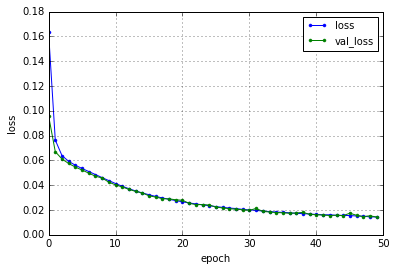

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1687 - val_loss: 0.1096
Epoch 2/50
0s - loss: 0.0827 - val_loss: 0.0680
Epoch 3/50
0s - loss: 0.0636 - val_loss: 0.0601
Epoch 4/50
0s - loss: 0.0578 - val_loss: 0.0556
Epoch 5/50
0s - loss: 0.0537 - val_loss: 0.0517
Epoch 6/50
0s - loss: 0.0501 - val_loss: 0.0483
Epoch 7/50
0s - loss: 0.0468 - val_loss: 0.0451
Epoch 8/50
0s - loss: 0.0437 - val_loss: 0.0421
Epoch 9/50
0s - loss: 0.0408 - val_loss: 0.0396
Epoch 10/50
0s - loss: 0.0383 - val_loss: 0.0370
Epoch 11/50
0s - loss: 0.0360 - val_loss: 0.0348
Epoch 12/50
0s - loss: 0.0339 - val_loss: 0.0329
Epoch 13/50
0s - loss: 0.0321 - val_loss: 0.0313
Epoch 14/50
0s - loss: 0.0304 - val_loss: 0.0295
Epoch 15/50
0s - loss: 0.0289 - val_loss: 0.0281
Epoch 16/50
0s - loss: 0.0276 - val_loss: 0.0268
Epoch 17/50
0s - loss: 0.0264 - val_loss: 0.0262
Epoch 18/50
0s - loss: 0.0253 - val_loss: 0.0249
Epoch 19/50
0s - loss: 0.0244 - val_loss: 0.0239
Epoch 20/50
0s

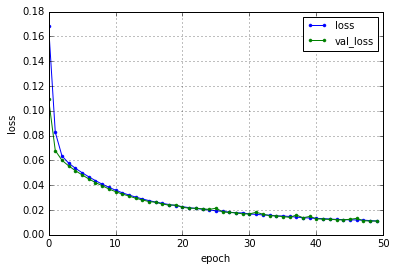

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1309 - val_loss: 0.0700
Epoch 2/50
0s - loss: 0.0627 - val_loss: 0.0580
Epoch 3/50
0s - loss: 0.0550 - val_loss: 0.0519
Epoch 4/50
0s - loss: 0.0493 - val_loss: 0.0468
Epoch 5/50
0s - loss: 0.0443 - val_loss: 0.0418
Epoch 6/50
0s - loss: 0.0394 - val_loss: 0.0369
Epoch 7/50
0s - loss: 0.0348 - val_loss: 0.0328
Epoch 8/50
0s - loss: 0.0310 - val_loss: 0.0293
Epoch 9/50
0s - loss: 0.0278 - val_loss: 0.0263
Epoch 10/50
0s - loss: 0.0252 - val_loss: 0.0242
Epoch 11/50
0s - loss: 0.0231 - val_loss: 0.0221
Epoch 12/50
0s - loss: 0.0214 - val_loss: 0.0212
Epoch 13/50
0s - loss: 0.0199 - val_loss: 0.0196
Epoch 14/50
0s - loss: 0.0186 - val_loss: 0.0188
Epoch 15/50
0s - loss: 0.0174 - val_loss: 0.0169
Epoch 16/50
0s - loss: 0.0164 - val_loss: 0.0167
Epoch 17/50
0s - loss: 0.0154 - val_loss: 0.0150
Epoch 18/50
0s - loss: 0.0146 - val_loss: 0.0143
Epoch 19/50
0s - loss: 0.0139 - val_loss: 0.0140
Epoch 20/50
0s

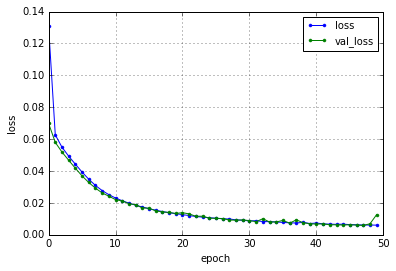

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1166 - val_loss: 0.0623
Epoch 2/50
0s - loss: 0.0563 - val_loss: 0.0508
Epoch 3/50
0s - loss: 0.0462 - val_loss: 0.0415
Epoch 4/50
0s - loss: 0.0376 - val_loss: 0.0336
Epoch 5/50
0s - loss: 0.0305 - val_loss: 0.0274
Epoch 6/50
0s - loss: 0.0252 - val_loss: 0.0230
Epoch 7/50
0s - loss: 0.0213 - val_loss: 0.0198
Epoch 8/50
0s - loss: 0.0185 - val_loss: 0.0177
Epoch 9/50
0s - loss: 0.0164 - val_loss: 0.0154
Epoch 10/50
0s - loss: 0.0146 - val_loss: 0.0140
Epoch 11/50
0s - loss: 0.0133 - val_loss: 0.0126
Epoch 12/50
0s - loss: 0.0121 - val_loss: 0.0119
Epoch 13/50
0s - loss: 0.0112 - val_loss: 0.0109
Epoch 14/50
0s - loss: 0.0104 - val_loss: 0.0100
Epoch 15/50
0s - loss: 0.0098 - val_loss: 0.0094
Epoch 16/50
0s - loss: 0.0092 - val_loss: 0.0089
Epoch 17/50
0s - loss: 0.0087 - val_loss: 0.0083
Epoch 18/50
0s - loss: 0.0082 - val_loss: 0.0081
Epoch 19/50
0s - loss: 0.0078 - val_loss: 0.0079
Epoch 20/50
0s

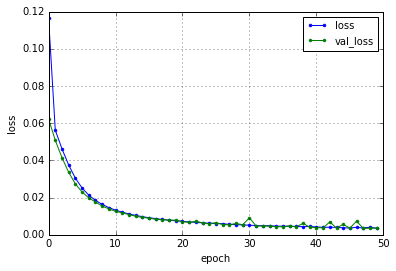

AccZ is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2037 - val_loss: 0.1963
Epoch 2/50
0s - loss: 0.1898 - val_loss: 0.1812
Epoch 3/50
0s - loss: 0.1729 - val_loss: 0.1625
Epoch 4/50
0s - loss: 0.1534 - val_loss: 0.1425
Epoch 5/50
0s - loss: 0.1344 - val_loss: 0.1254
Epoch 6/50
0s - loss: 0.1191 - val_loss: 0.1123
Epoch 7/50
0s - loss: 0.1077 - val_loss: 0.1027
Epoch 8/50
0s - loss: 0.0994 - val_loss: 0.0958
Epoch 9/50
0s - loss: 0.0934 - val_loss: 0.0908
Epoch 10/50
0s - loss: 0.0889 - val_loss: 0.0869
Epoch 11/50
0s - loss: 0.0855 - val_loss: 0.0838
Epoch 12/50
0s - loss: 0.0827 - val_loss: 0.0814
Epoch 13/50
0s - loss: 0.0804 - val_loss: 0.0793
Epoch 14/50
0s - loss: 0.0785 - val_loss: 0.0776
Epoch 15/50
0s - loss: 0.0769 - val_loss: 0.0761
Epoch 16/50
0s - loss: 0.0755 - val_loss: 0.0748
Epoch 17/50
0s - loss: 0.0742 

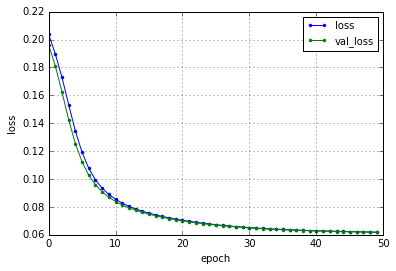

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1976 - val_loss: 0.1826
Epoch 2/50
0s - loss: 0.1661 - val_loss: 0.1459
Epoch 3/50
0s - loss: 0.1315 - val_loss: 0.1165
Epoch 4/50
0s - loss: 0.1076 - val_loss: 0.0987
Epoch 5/50
0s - loss: 0.0936 - val_loss: 0.0884
Epoch 6/50
0s - loss: 0.0855 - val_loss: 0.0825
Epoch 7/50
0s - loss: 0.0807 - val_loss: 0.0788
Epoch 8/50
0s - loss: 0.0775 - val_loss: 0.0761
Epoch 9/50
0s - loss: 0.0752 - val_loss: 0.0741
Epoch 10/50
0s - loss: 0.0734 - val_loss: 0.0725
Epoch 11/50
0s - loss: 0.0719 - val_loss: 0.0712
Epoch 12/50
0s - loss: 0.0707 - val_loss: 0.0700
Epoch 13/50
0s - loss: 0.0696 - val_loss: 0.0691
Epoch 14/50
0s - loss: 0.0687 - val_loss: 0.0682
Epoch 15/50
0s - loss: 0.0679 - val_loss: 0.0674
Epoch 16/50
0s - loss: 0.0671 - val_loss: 0.0668
Epoch 17/50
0s - loss: 0.0665 - val_loss: 0.0662
Epoch 18/50
0s - loss: 0.0659 - val_loss: 0.0657
Epoch 19/50
0s - loss: 0.0654 - val_loss: 0.0651
Epoch 20/50
0s 

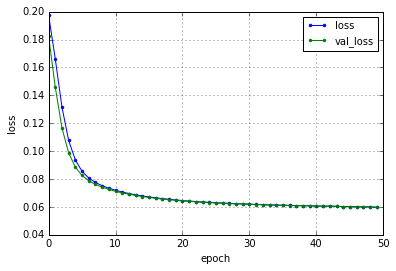

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2008 - val_loss: 0.1876
Epoch 2/50
0s - loss: 0.1712 - val_loss: 0.1499
Epoch 3/50
0s - loss: 0.1330 - val_loss: 0.1150
Epoch 4/50
0s - loss: 0.1041 - val_loss: 0.0934
Epoch 5/50
0s - loss: 0.0879 - val_loss: 0.0826
Epoch 6/50
0s - loss: 0.0798 - val_loss: 0.0771
Epoch 7/50
0s - loss: 0.0755 - val_loss: 0.0738
Epoch 8/50
0s - loss: 0.0727 - val_loss: 0.0716
Epoch 9/50
0s - loss: 0.0708 - val_loss: 0.0699
Epoch 10/50
0s - loss: 0.0693 - val_loss: 0.0686
Epoch 11/50
0s - loss: 0.0681 - val_loss: 0.0676
Epoch 12/50
0s - loss: 0.0672 - val_loss: 0.0667
Epoch 13/50
0s - loss: 0.0663 - val_loss: 0.0659
Epoch 14/50
0s - loss: 0.0656 - val_loss: 0.0652
Epoch 15/50
0s - loss: 0.0650 - val_loss: 0.0646
Epoch 16/50
0s - loss: 0.0644 - val_loss: 0.0641
Epoch 17/50
0s - loss: 0.0639 - val_loss: 0.0636
Epoch 18/50
0s - loss: 0.0634 - val_loss: 0.0632
Epoch 19/50
0s - loss: 0.0630 - val_loss: 0.0628
Epoch 20/50
0s

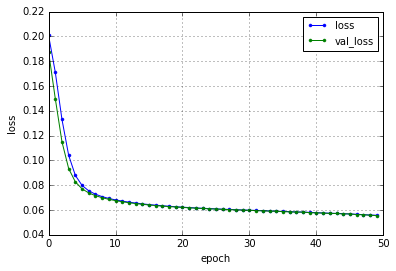

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1979 - val_loss: 0.1769
Epoch 2/50
0s - loss: 0.1563 - val_loss: 0.1315
Epoch 3/50
0s - loss: 0.1150 - val_loss: 0.0989
Epoch 4/50
0s - loss: 0.0907 - val_loss: 0.0832
Epoch 5/50
0s - loss: 0.0796 - val_loss: 0.0763
Epoch 6/50
0s - loss: 0.0745 - val_loss: 0.0728
Epoch 7/50
0s - loss: 0.0717 - val_loss: 0.0706
Epoch 8/50
0s - loss: 0.0699 - val_loss: 0.0690
Epoch 9/50
0s - loss: 0.0685 - val_loss: 0.0678
Epoch 10/50
0s - loss: 0.0673 - val_loss: 0.0668
Epoch 11/50
0s - loss: 0.0664 - val_loss: 0.0659
Epoch 12/50
0s - loss: 0.0656 - val_loss: 0.0651
Epoch 13/50
0s - loss: 0.0648 - val_loss: 0.0644
Epoch 14/50
0s - loss: 0.0642 - val_loss: 0.0638
Epoch 15/50
0s - loss: 0.0636 - val_loss: 0.0633
Epoch 16/50
0s - loss: 0.0631 - val_loss: 0.0628
Epoch 17/50
0s - loss: 0.0626 - val_loss: 0.0623
Epoch 18/50
0s - loss: 0.0621 - val_loss: 0.0618
Epoch 19/50
0s - loss: 0.0617 - val_loss: 0.0614
Epoch 20/50
0s

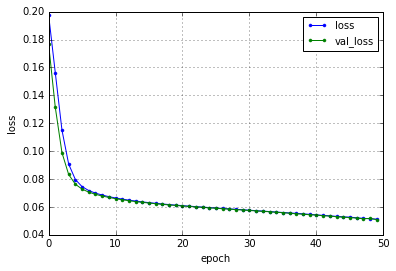

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.2004 - val_loss: 0.1693
Epoch 2/50
0s - loss: 0.1414 - val_loss: 0.1111
Epoch 3/50
0s - loss: 0.0955 - val_loss: 0.0824
Epoch 4/50
0s - loss: 0.0774 - val_loss: 0.0732
Epoch 5/50
0s - loss: 0.0714 - val_loss: 0.0697
Epoch 6/50
0s - loss: 0.0688 - val_loss: 0.0678
Epoch 7/50
0s - loss: 0.0671 - val_loss: 0.0663
Epoch 8/50
0s - loss: 0.0658 - val_loss: 0.0651
Epoch 9/50
0s - loss: 0.0647 - val_loss: 0.0640
Epoch 10/50
0s - loss: 0.0637 - val_loss: 0.0631
Epoch 11/50
0s - loss: 0.0627 - val_loss: 0.0622
Epoch 12/50
0s - loss: 0.0619 - val_loss: 0.0615
Epoch 13/50
0s - loss: 0.0612 - val_loss: 0.0607
Epoch 14/50
0s - loss: 0.0604 - val_loss: 0.0600
Epoch 15/50
0s - loss: 0.0598 - val_loss: 0.0594
Epoch 16/50
0s - loss: 0.0591 - val_loss: 0.0588
Epoch 17/50
0s - loss: 0.0585 - val_loss: 0.0581
Epoch 18/50
0s - loss: 0.0578 - val_loss: 0.0575
Epoch 19/50
0s - loss: 0.0572 - val_loss: 0.0568
Epoch 20/50
0s

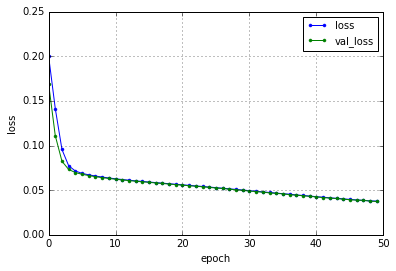

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1863 - val_loss: 0.1370
Epoch 2/50
0s - loss: 0.1089 - val_loss: 0.0844
Epoch 3/50
0s - loss: 0.0762 - val_loss: 0.0701
Epoch 4/50
0s - loss: 0.0681 - val_loss: 0.0663
Epoch 5/50
0s - loss: 0.0654 - val_loss: 0.0643
Epoch 6/50
0s - loss: 0.0636 - val_loss: 0.0627
Epoch 7/50
0s - loss: 0.0620 - val_loss: 0.0612
Epoch 8/50
0s - loss: 0.0606 - val_loss: 0.0598
Epoch 9/50
0s - loss: 0.0592 - val_loss: 0.0584
Epoch 10/50
0s - loss: 0.0579 - val_loss: 0.0571
Epoch 11/50
0s - loss: 0.0566 - val_loss: 0.0559
Epoch 12/50
0s - loss: 0.0553 - val_loss: 0.0546
Epoch 13/50
0s - loss: 0.0541 - val_loss: 0.0534
Epoch 14/50
0s - loss: 0.0529 - val_loss: 0.0522
Epoch 15/50
0s - loss: 0.0517 - val_loss: 0.0511
Epoch 16/50
0s - loss: 0.0506 - val_loss: 0.0499
Epoch 17/50
0s - loss: 0.0494 - val_loss: 0.0487
Epoch 18/50
0s - loss: 0.0483 - val_loss: 0.0476
Epoch 19/50
0s - loss: 0.0471 - val_loss: 0.0465
Epoch 20/50
0s

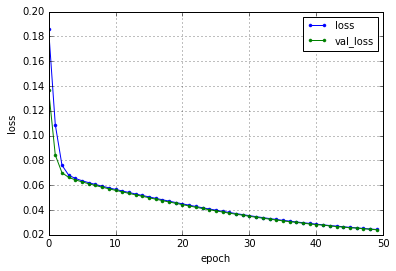

AccZ is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2073 - val_loss: 0.2058
Epoch 2/50
0s - loss: 0.2054 - val_loss: 0.2046
Epoch 3/50
0s - loss: 0.2041 - val_loss: 0.2034
Epoch 4/50
0s - loss: 0.2029 - val_loss: 0.2021
Epoch 5/50
0s - loss: 0.2015 - val_loss: 0.2005
Epoch 6/50
0s - loss: 0.1999 - val_loss: 0.1986
Epoch 7/50
0s - loss: 0.1977 - val_loss: 0.1960
Epoch 8/50
0s - loss: 0.1949 - val_loss: 0.1928
Epoch 9/50
0s - loss: 0.1914 - val_loss: 0.1889
Epoch 10/50
0s - loss: 0.1873 - val_loss: 0.1845
Epoch 11/50
0s - loss: 0.1828 - val_loss: 0.1797
Epoch 12/50
0s - loss: 0.1779 - val_loss: 0.1748
Epoch 13/50
0s - loss: 0.1730 - val_loss: 0.1699
Epoch 14/50
0s - loss: 0.1681 - val_loss: 0.1651
Epoch 15/50
0s - loss: 0.1634 - val_loss: 0.1604
Epoch 16/50
0s - loss: 0.1588 - val_loss: 0.1559
Epoch 17/50
0s - loss: 0.1544 - v

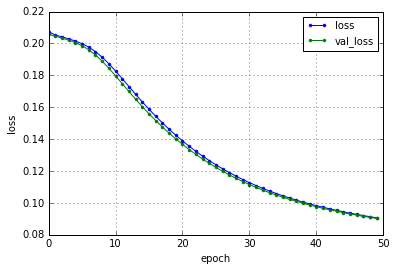

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2080 - val_loss: 0.2052
Epoch 2/50
0s - loss: 0.2042 - val_loss: 0.2023
Epoch 3/50
0s - loss: 0.2012 - val_loss: 0.1989
Epoch 4/50
0s - loss: 0.1975 - val_loss: 0.1947
Epoch 5/50
0s - loss: 0.1930 - val_loss: 0.1898
Epoch 6/50
0s - loss: 0.1878 - val_loss: 0.1843
Epoch 7/50
0s - loss: 0.1822 - val_loss: 0.1785
Epoch 8/50
0s - loss: 0.1764 - val_loss: 0.1725
Epoch 9/50
0s - loss: 0.1703 - val_loss: 0.1664
Epoch 10/50
0s - loss: 0.1641 - val_loss: 0.1602
Epoch 11/50
0s - loss: 0.1579 - val_loss: 0.1540
Epoch 12/50
0s - loss: 0.1518 - val_loss: 0.1480
Epoch 13/50
0s - loss: 0.1459 - val_loss: 0.1422
Epoch 14/50
0s - loss: 0.1402 - val_loss: 0.1367
Epoch 15/50
0s - loss: 0.1348 - val_loss: 0.1315
Epoch 16/50
0s - loss: 0.1297 - val_loss: 0.1267
Epoch 17/50
0s - loss: 0.1250 - val_loss: 0.1222
Epoch 18/50
0s - loss: 0.1207 - val_loss: 0.1181
Epoch 19/50
0s - loss: 0.1167 - val_loss: 0.1144
Epoch 20/50
0s - 

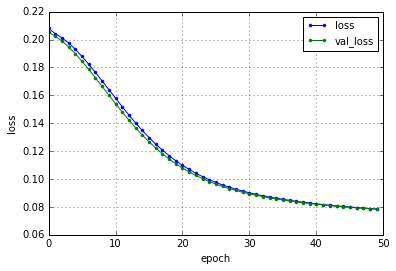

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2088 - val_loss: 0.2049
Epoch 2/50
0s - loss: 0.2033 - val_loss: 0.2006
Epoch 3/50
0s - loss: 0.1989 - val_loss: 0.1958
Epoch 4/50
0s - loss: 0.1937 - val_loss: 0.1898
Epoch 5/50
0s - loss: 0.1873 - val_loss: 0.1827
Epoch 6/50
0s - loss: 0.1799 - val_loss: 0.1747
Epoch 7/50
0s - loss: 0.1716 - val_loss: 0.1662
Epoch 8/50
0s - loss: 0.1631 - val_loss: 0.1576
Epoch 9/50
0s - loss: 0.1545 - val_loss: 0.1491
Epoch 10/50
0s - loss: 0.1462 - val_loss: 0.1412
Epoch 11/50
0s - loss: 0.1384 - val_loss: 0.1337
Epoch 12/50
0s - loss: 0.1312 - val_loss: 0.1269
Epoch 13/50
0s - loss: 0.1246 - val_loss: 0.1207
Epoch 14/50
0s - loss: 0.1187 - val_loss: 0.1153
Epoch 15/50
0s - loss: 0.1134 - val_loss: 0.1104
Epoch 16/50
0s - loss: 0.1088 - val_loss: 0.1061
Epoch 17/50
0s - loss: 0.1047 - val_loss: 0.1024
Epoch 18/50
0s - loss: 0.1012 - val_loss: 0.0991
Epoch 19/50
0s - loss: 0.0981 - val_loss: 0.0963
Epoch 20/50
0s -

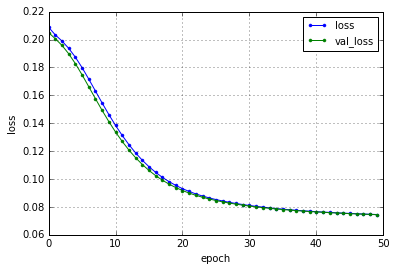

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2102 - val_loss: 0.2049
Epoch 2/50
0s - loss: 0.2030 - val_loss: 0.1996
Epoch 3/50
0s - loss: 0.1974 - val_loss: 0.1931
Epoch 4/50
0s - loss: 0.1902 - val_loss: 0.1847
Epoch 5/50
0s - loss: 0.1811 - val_loss: 0.1746
Epoch 6/50
0s - loss: 0.1706 - val_loss: 0.1634
Epoch 7/50
0s - loss: 0.1593 - val_loss: 0.1522
Epoch 8/50
0s - loss: 0.1482 - val_loss: 0.1414
Epoch 9/50
0s - loss: 0.1377 - val_loss: 0.1315
Epoch 10/50
0s - loss: 0.1283 - val_loss: 0.1228
Epoch 11/50
0s - loss: 0.1201 - val_loss: 0.1154
Epoch 12/50
0s - loss: 0.1130 - val_loss: 0.1091
Epoch 13/50
0s - loss: 0.1071 - val_loss: 0.1037
Epoch 14/50
0s - loss: 0.1021 - val_loss: 0.0993
Epoch 15/50
0s - loss: 0.0979 - val_loss: 0.0956
Epoch 16/50
0s - loss: 0.0945 - val_loss: 0.0926
Epoch 17/50
0s - loss: 0.0916 - val_loss: 0.0900
Epoch 18/50
0s - loss: 0.0893 - val_loss: 0.0879
Epoch 19/50
0s - loss: 0.0873 - val_loss: 0.0862
Epoch 20/50
0s -

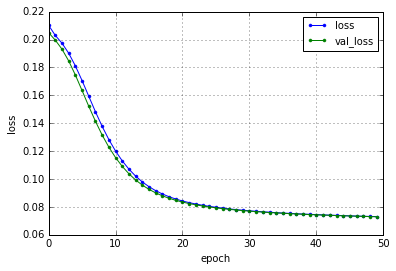

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2129 - val_loss: 0.2030
Epoch 2/50
0s - loss: 0.1992 - val_loss: 0.1926
Epoch 3/50
0s - loss: 0.1885 - val_loss: 0.1809
Epoch 4/50
0s - loss: 0.1760 - val_loss: 0.1671
Epoch 5/50
0s - loss: 0.1619 - val_loss: 0.1525
Epoch 6/50
0s - loss: 0.1472 - val_loss: 0.1382
Epoch 7/50
0s - loss: 0.1334 - val_loss: 0.1254
Epoch 8/50
0s - loss: 0.1213 - val_loss: 0.1145
Epoch 9/50
0s - loss: 0.1111 - val_loss: 0.1056
Epoch 10/50
0s - loss: 0.1029 - val_loss: 0.0985
Epoch 11/50
0s - loss: 0.0964 - val_loss: 0.0930
Epoch 12/50
0s - loss: 0.0914 - val_loss: 0.0887
Epoch 13/50
0s - loss: 0.0875 - val_loss: 0.0855
Epoch 14/50
0s - loss: 0.0845 - val_loss: 0.0830
Epoch 15/50
0s - loss: 0.0823 - val_loss: 0.0811
Epoch 16/50
0s - loss: 0.0806 - val_loss: 0.0796
Epoch 17/50
0s - loss: 0.0792 - val_loss: 0.0785
Epoch 18/50
0s - loss: 0.0782 - val_loss: 0.0776
Epoch 19/50
0s - loss: 0.0773 - val_loss: 0.0768
Epoch 20/50
0s -

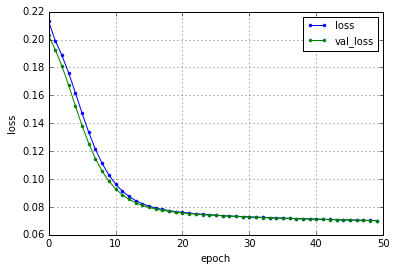

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.2176 - val_loss: 0.2028
Epoch 2/50
0s - loss: 0.1976 - val_loss: 0.1883
Epoch 3/50
0s - loss: 0.1826 - val_loss: 0.1720
Epoch 4/50
0s - loss: 0.1653 - val_loss: 0.1534
Epoch 5/50
0s - loss: 0.1467 - val_loss: 0.1349
Epoch 6/50
0s - loss: 0.1288 - val_loss: 0.1185
Epoch 7/50
0s - loss: 0.1134 - val_loss: 0.1051
Epoch 8/50
0s - loss: 0.1012 - val_loss: 0.0951
Epoch 9/50
0s - loss: 0.0923 - val_loss: 0.0879
Epoch 10/50
0s - loss: 0.0860 - val_loss: 0.0830
Epoch 11/50
0s - loss: 0.0818 - val_loss: 0.0797
Epoch 12/50
0s - loss: 0.0789 - val_loss: 0.0776
Epoch 13/50
0s - loss: 0.0770 - val_loss: 0.0761
Epoch 14/50
0s - loss: 0.0757 - val_loss: 0.0750
Epoch 15/50
0s - loss: 0.0748 - val_loss: 0.0743
Epoch 16/50
0s - loss: 0.0741 - val_loss: 0.0737
Epoch 17/50
0s - loss: 0.0735 - val_loss: 0.0732
Epoch 18/50
0s - loss: 0.0731 - val_loss: 0.0728
Epoch 19/50
0s - loss: 0.0727 - val_loss: 0.0725
Epoch 20/50
0s -

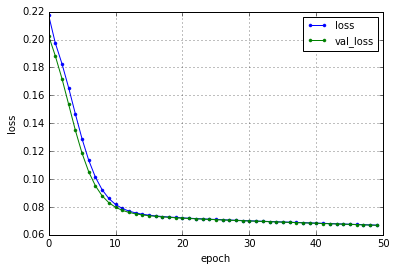

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2 ,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()